## Import Libraries

In [372]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
import os
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

## Load DataSet

In [373]:
Data = pd.read_csv("dataset.csv")
Data.shape

(10000, 14)

In [374]:
Data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [375]:
Data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## Cleaning and Plotting Data 

In [376]:
Data = Data.drop(['RowNumber','CustomerId','Surname'],axis=1)
Data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [377]:
encoder = LabelEncoder()
col1 = Data['Geography']
data_encoded1 = encoder.fit_transform(col1)
Data["Geography"] = data_encoded1
col2 = Data['Gender']
data_encoded2 = encoder.fit_transform(col2)
Data["Gender"] = data_encoded2
Data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [378]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int64  
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 859.5 KB


In [379]:
Data["Geography"].value_counts()

0    5014
1    2509
2    2477
Name: Geography, dtype: int64

In [380]:
Data["NumOfProducts"].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

In [381]:
Data["HasCrCard"].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

In [382]:
Data[['IsActiveMember', 'Exited']].apply(pd.Series.value_counts)

,IsActiveMember,Exited
0,4849,7963
1,5151,2037


### Showing Some Relational Statistical Plots

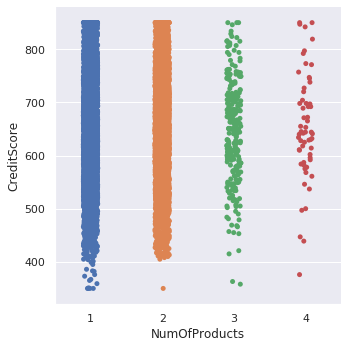

In [383]:
sns.catplot(x="NumOfProducts", y="CreditScore",data=Data)

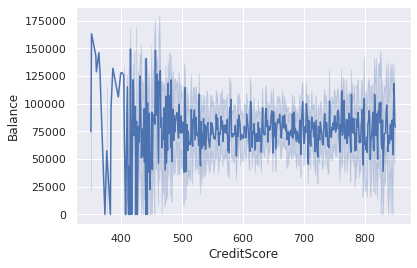

In [384]:
sns.lineplot(x="CreditScore", y="Balance",data=Data)

CreditScore and Balance are highely fluctuating in the above plot
- Balance are highly fluctated on large range at low & high credit score
- On the other hand, mid range credit score (500~700) less fluctating 

So most probably we can't find a useful relational information here 

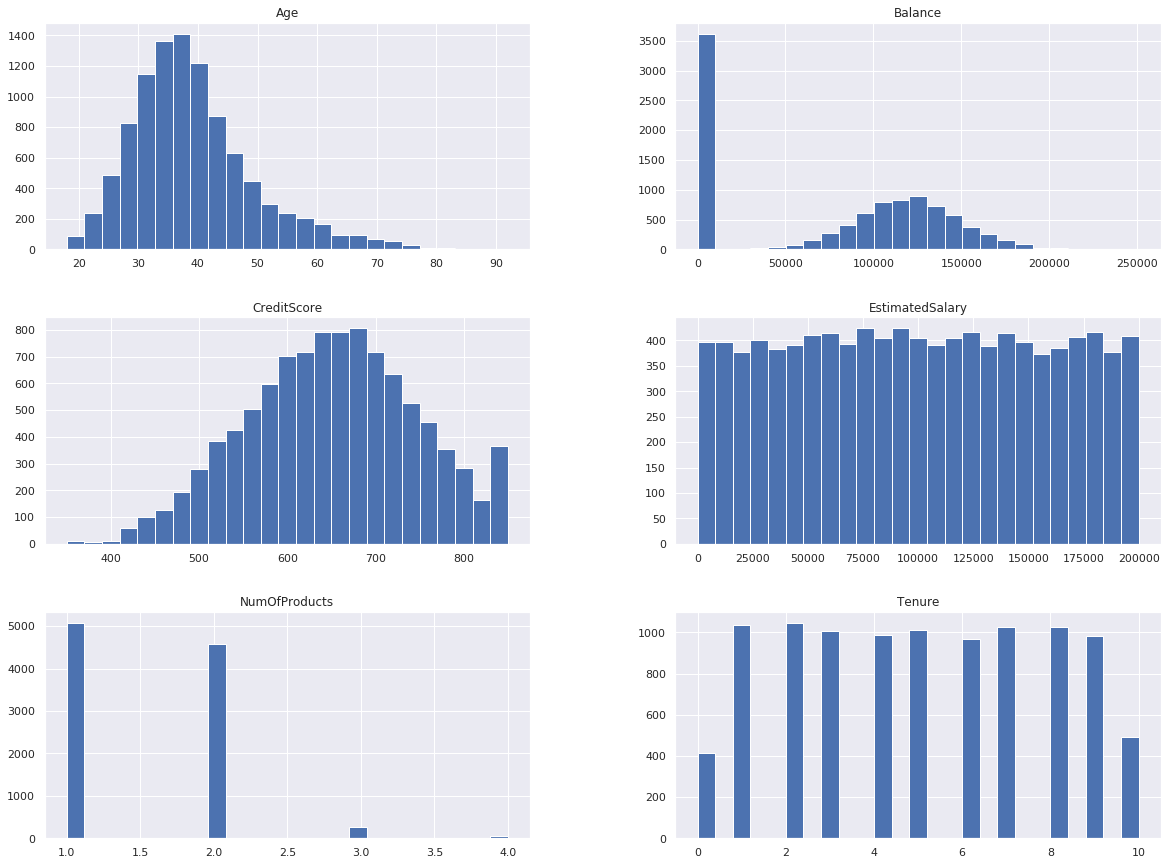

In [385]:
Data.hist(["CreditScore","Balance","Age","Tenure","EstimatedSalary","NumOfProducts"],bins=25, figsize=(20,15))
plt.show()

### Plots & Histogram Summary:

1. Most of the customers under 45 years (typically in range of 30~45)
2. Too many Customers with zero Balance that would negitively affect the revenues and our model
3. Most of the highest Credit Score in range of 550~780 
4. Not Much of Information estimated from the Estimated Salary attribute.
5. There most probably a corrleation between credit score and number of # products
6. Most of the number products available are 1 & 2

But we still need more Analysis to have an deeper insight for the Data

### Focusing on most important attributes we try to find Scatter matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb106ab4310>,
      dtype=object)

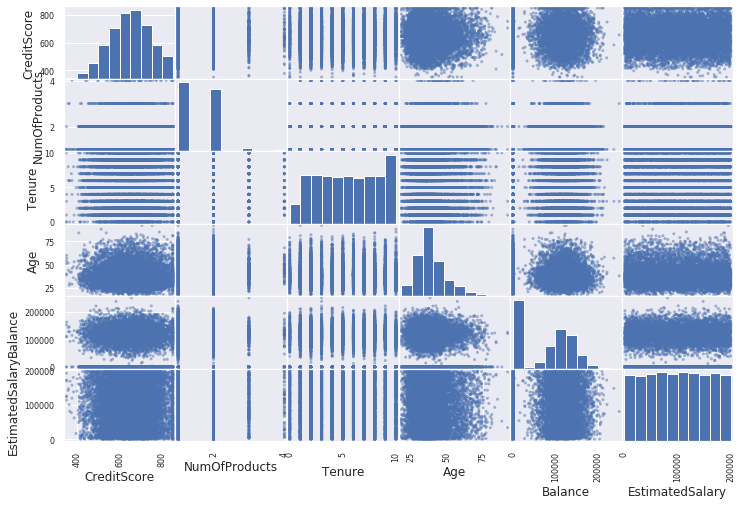

In [386]:
attributes = ["CreditScore","NumOfProducts","Tenure", "Age",
"Balance","EstimatedSalary"]
scatter_matrix(Data[attributes], figsize=(12, 8))

### Scatter Matrix summary

1. The main diagonal represents attributes histogram
2. Credit Score and Balance are mostly uncorrelated 
3. It seems that maybe age and credit score have correlation
4. Also it is not that clear with other attributes

So maybe we get more insight if we looked at the correlation matrix

In [387]:
corr_matrix = Data.corr()
corr_matrix["CreditScore"].sort_values(ascending=False)

CreditScore        1.000000
IsActiveMember     0.025651
NumOfProducts      0.012238
Geography          0.007888
Balance            0.006268
Tenure             0.000842
EstimatedSalary   -0.001384
Gender            -0.002857
Age               -0.003965
HasCrCard         -0.005458
Exited            -0.027094
Name: CreditScore, dtype: float64

In [388]:
corr_matrix = Data.corr()
corr_matrix["NumOfProducts"].sort_values(ascending=False)

NumOfProducts      1.000000
EstimatedSalary    0.014204
Tenure             0.013444
CreditScore        0.012238
IsActiveMember     0.009612
Geography          0.003972
HasCrCard          0.003183
Gender            -0.021859
Age               -0.030680
Exited            -0.047820
Balance           -0.304180
Name: NumOfProducts, dtype: float64

- Negative Correlation between Balance and NumOfProducts -0.3

In [389]:
corr_matrix = Data.corr()
corr_matrix["Age"].sort_values(ascending=False)

Age                1.000000
Exited             0.285323
IsActiveMember     0.085472
Balance            0.028308
Geography          0.022812
CreditScore       -0.003965
EstimatedSalary   -0.007201
Tenure            -0.009997
HasCrCard         -0.011721
Gender            -0.027544
NumOfProducts     -0.030680
Name: Age, dtype: float64

- Age & Exited have a correlation of approx 0.3

In [390]:
corr_matrix = Data.corr()
corr_matrix["Geography"].sort_values(ascending=False)

Geography          1.000000
Balance            0.069408
Exited             0.035943
Age                0.022812
CreditScore        0.007888
IsActiveMember     0.006724
Gender             0.004719
NumOfProducts      0.003972
Tenure             0.003739
EstimatedSalary   -0.001369
HasCrCard         -0.008523
Name: Geography, dtype: float64

In [391]:
corr_matrix = Data.corr()
corr_matrix["Exited"].sort_values(ascending=False)

Exited             1.000000
Age                0.285323
Balance            0.118533
Geography          0.035943
EstimatedSalary    0.012097
HasCrCard         -0.007138
Tenure            -0.014001
CreditScore       -0.027094
NumOfProducts     -0.047820
Gender            -0.106512
IsActiveMember    -0.156128
Name: Exited, dtype: float64

- Negative Correlation between Exited and IsActiveMember -0.1

In [392]:
corr_matrix = Data.corr()
corr_matrix["IsActiveMember"].sort_values(ascending=False)

IsActiveMember     1.000000
Age                0.085472
CreditScore        0.025651
Gender             0.022544
NumOfProducts      0.009612
Geography          0.006724
Balance           -0.010084
EstimatedSalary   -0.011421
HasCrCard         -0.011866
Tenure            -0.028362
Exited            -0.156128
Name: IsActiveMember, dtype: float64

- Negative Corrlation between Is Active & Exited

In [393]:
corr_matrix = Data.corr()
corr_matrix["Balance"].sort_values(ascending=False)

Balance            1.000000
Exited             0.118533
Geography          0.069408
Age                0.028308
EstimatedSalary    0.012797
Gender             0.012087
CreditScore        0.006268
IsActiveMember    -0.010084
Tenure            -0.012254
HasCrCard         -0.014858
NumOfProducts     -0.304180
Name: Balance, dtype: float64

- Balance and Exited have correlation of approx 0.1
- Negative Correlation between Balance and NumOfProducts -0.3

In [394]:
corr_matrix = Data.corr()
corr_matrix["EstimatedSalary"].sort_values(ascending=False)

EstimatedSalary    1.000000
NumOfProducts      0.014204
Balance            0.012797
Exited             0.012097
Tenure             0.007784
Geography         -0.001369
CreditScore       -0.001384
Age               -0.007201
Gender            -0.008112
HasCrCard         -0.009933
IsActiveMember    -0.011421
Name: EstimatedSalary, dtype: float64

In [395]:
corr_matrix = Data.corr()
corr_matrix["Tenure"].sort_values(ascending=False)

Tenure             1.000000
HasCrCard          0.022583
Gender             0.014733
NumOfProducts      0.013444
EstimatedSalary    0.007784
Geography          0.003739
CreditScore        0.000842
Age               -0.009997
Balance           -0.012254
Exited            -0.014001
IsActiveMember    -0.028362
Name: Tenure, dtype: float64

In [396]:
corr_matrix = Data.corr()
corr_matrix["HasCrCard"].sort_values(ascending=False)

HasCrCard          1.000000
Tenure             0.022583
Gender             0.005766
NumOfProducts      0.003183
CreditScore       -0.005458
Exited            -0.007138
Geography         -0.008523
EstimatedSalary   -0.009933
Age               -0.011721
IsActiveMember    -0.011866
Balance           -0.014858
Name: HasCrCard, dtype: float64

## Experimenting with Attribute Combinations

Since we don't get much of information of above correlations.Now, let's try to derive more informations by mixing some attributes like tenure (mainly a period of holding money) and balance or estimated salary 

In [397]:
Data["Tenure"].value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

In [398]:

Data["Balance_per_Tenure"] = Data["Balance"]/Data["Tenure"]
Data["EstimatedSalary_per_Tenure"] = Data["EstimatedSalary"]/Data["Tenure"]
Data.isna().sum()

CreditScore                     0
Geography                       0
Gender                          0
Age                             0
Tenure                          0
Balance                         0
NumOfProducts                   0
HasCrCard                       0
IsActiveMember                  0
EstimatedSalary                 0
Exited                          0
Balance_per_Tenure            137
EstimatedSalary_per_Tenure      0
dtype: int64

In [399]:
Data = Data.replace([np.inf, -np.inf], np.nan)
Data.isna().sum()

CreditScore                     0
Geography                       0
Gender                          0
Age                             0
Tenure                          0
Balance                         0
NumOfProducts                   0
HasCrCard                       0
IsActiveMember                  0
EstimatedSalary                 0
Exited                          0
Balance_per_Tenure            413
EstimatedSalary_per_Tenure    413
dtype: int64

In [400]:
Data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Balance_per_Tenure,EstimatedSalary_per_Tenure
0,619,0,0,42,2,0.00,1,1,1,101348.88,1,0.00,50674.44000
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0,83807.86,112542.58000
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1,19957.60,14241.44625
3,699,0,0,39,1,0.00,2,0,0,93826.63,0,0.00,93826.63000
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0,62755.41,39542.05000


In [401]:
corr_matrix = Data.corr()
corr_matrix["Balance_per_Tenure"].sort_values(ascending=False)

Balance_per_Tenure            1.000000
Balance                       0.584738
EstimatedSalary_per_Tenure    0.505287
Exited                        0.070780
Geography                     0.036208
Age                           0.020142
IsActiveMember                0.018007
EstimatedSalary               0.010562
CreditScore                   0.004651
Gender                       -0.004796
HasCrCard                    -0.027479
NumOfProducts                -0.185284
Tenure                       -0.521687
Name: Balance_per_Tenure, dtype: float64

* ### Oh that seems promising as we found correlation between Balance_per_Tenure,Balance,and EstimatedSalary_per_Tenure

In [402]:
corr_matrix = Data.corr()
corr_matrix["EstimatedSalary_per_Tenure"].sort_values(ascending=False)

EstimatedSalary_per_Tenure    1.000000
Balance_per_Tenure            0.505287
EstimatedSalary               0.492914
IsActiveMember                0.026603
Balance                       0.021343
Exited                        0.017585
Age                           0.008401
Gender                       -0.005882
CreditScore                  -0.006499
NumOfProducts                -0.007904
Geography                    -0.010706
HasCrCard                    -0.020053
Tenure                       -0.608354
Name: EstimatedSalary_per_Tenure, dtype: float64

In [403]:
corr_matrix = Data.corr()
corr_matrix["CreditScore"].sort_values(ascending=False)

CreditScore                   1.000000
IsActiveMember                0.025651
NumOfProducts                 0.012238
Geography                     0.007888
Balance                       0.006268
Balance_per_Tenure            0.004651
Tenure                        0.000842
EstimatedSalary              -0.001384
Gender                       -0.002857
Age                          -0.003965
HasCrCard                    -0.005458
EstimatedSalary_per_Tenure   -0.006499
Exited                       -0.027094
Name: CreditScore, dtype: float64

In [404]:
corr_matrix = Data.corr()
corr_matrix["NumOfProducts"].sort_values(ascending=False)

NumOfProducts                 1.000000
EstimatedSalary               0.014204
Tenure                        0.013444
CreditScore                   0.012238
IsActiveMember                0.009612
Geography                     0.003972
HasCrCard                     0.003183
EstimatedSalary_per_Tenure   -0.007904
Gender                       -0.021859
Age                          -0.030680
Exited                       -0.047820
Balance_per_Tenure           -0.185284
Balance                      -0.304180
Name: NumOfProducts, dtype: float64

- Negative Correlation between Balance,Balance_per_Tenure and NumOfProducts

In [405]:
corr_matrix = Data.corr()
corr_matrix["IsActiveMember"].sort_values(ascending=False)

IsActiveMember                1.000000
Age                           0.085472
EstimatedSalary_per_Tenure    0.026603
CreditScore                   0.025651
Gender                        0.022544
Balance_per_Tenure            0.018007
NumOfProducts                 0.009612
Geography                     0.006724
Balance                      -0.010084
EstimatedSalary              -0.011421
HasCrCard                    -0.011866
Tenure                       -0.028362
Exited                       -0.156128
Name: IsActiveMember, dtype: float64

In [406]:
corr_matrix = Data.corr()
corr_matrix["Exited"].sort_values(ascending=False)

Exited                        1.000000
Age                           0.285323
Balance                       0.118533
Balance_per_Tenure            0.070780
Geography                     0.035943
EstimatedSalary_per_Tenure    0.017585
EstimatedSalary               0.012097
HasCrCard                    -0.007138
Tenure                       -0.014001
CreditScore                  -0.027094
NumOfProducts                -0.047820
Gender                       -0.106512
IsActiveMember               -0.156128
Name: Exited, dtype: float64

In [407]:
corr_matrix = Data.corr()
corr_matrix["Age"].sort_values(ascending=False)

Age                           1.000000
Exited                        0.285323
IsActiveMember                0.085472
Balance                       0.028308
Geography                     0.022812
Balance_per_Tenure            0.020142
EstimatedSalary_per_Tenure    0.008401
CreditScore                  -0.003965
EstimatedSalary              -0.007201
Tenure                       -0.009997
HasCrCard                    -0.011721
Gender                       -0.027544
NumOfProducts                -0.030680
Name: Age, dtype: float64

In [408]:
corr_matrix = Data.corr()
corr_matrix["Geography"].sort_values(ascending=False)

Geography                     1.000000
Balance                       0.069408
Balance_per_Tenure            0.036208
Exited                        0.035943
Age                           0.022812
CreditScore                   0.007888
IsActiveMember                0.006724
Gender                        0.004719
NumOfProducts                 0.003972
Tenure                        0.003739
EstimatedSalary              -0.001369
HasCrCard                    -0.008523
EstimatedSalary_per_Tenure   -0.010706
Name: Geography, dtype: float64

In [409]:
Data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Balance_per_Tenure,EstimatedSalary_per_Tenure
0,619,0,0,42,2,0.00,1,1,1,101348.88,1,0.00,50674.44000
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0,83807.86,112542.58000
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1,19957.60,14241.44625
3,699,0,0,39,1,0.00,2,0,0,93826.63,0,0.00,93826.63000
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0,62755.41,39542.05000


In [410]:
Data.describe()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Balance_per_Tenure,EstimatedSalary_per_Tenure
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,9587.000000,9587.000000
mean,650.528800,0.746300,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,23629.946503,30588.503512
std,96.653299,0.827529,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,32842.118400,35758.110866
min,350.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,2.895000
25%,584.000000,0.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,9634.083000
50%,652.000000,0.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,14841.190000,19093.709000
75%,718.000000,1.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,28892.667083,34924.170000
max,850.000000,2.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,211774.310000,199661.500000


In [411]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CreditScore                 10000 non-null  int64  
 1   Geography                   10000 non-null  int64  
 2   Gender                      10000 non-null  int64  
 3   Age                         10000 non-null  int64  
 4   Tenure                      10000 non-null  int64  
 5   Balance                     10000 non-null  float64
 6   NumOfProducts               10000 non-null  int64  
 7   HasCrCard                   10000 non-null  int64  
 8   IsActiveMember              10000 non-null  int64  
 9   EstimatedSalary             10000 non-null  float64
 10  Exited                      10000 non-null  int64  
 11  Balance_per_Tenure          9587 non-null   float64
 12  EstimatedSalary_per_Tenure  9587 non-null   float64
dtypes: float64(4), int64(9)
memory u

In [412]:
Data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Balance_per_Tenure,EstimatedSalary_per_Tenure
0,619,0,0,42,2,0.00,1,1,1,101348.88,1,0.00,50674.44000
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0,83807.86,112542.58000
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1,19957.60,14241.44625
3,699,0,0,39,1,0.00,2,0,0,93826.63,0,0.00,93826.63000
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0,62755.41,39542.05000


Fitting Null values with the mean

In [413]:
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
imputer=imputer.fit(Data)
Data[:] = imputer.transform(Data)
Data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Balance_per_Tenure,EstimatedSalary_per_Tenure
0,619.0,0.0,0.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0,0.00,50674.44000
1,608.0,2.0,0.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0,83807.86,112542.58000
2,502.0,0.0,0.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0,19957.60,14241.44625
3,699.0,0.0,0.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0,0.00,93826.63000
4,850.0,2.0,0.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0,62755.41,39542.05000


In [414]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CreditScore                 10000 non-null  float64
 1   Geography                   10000 non-null  float64
 2   Gender                      10000 non-null  float64
 3   Age                         10000 non-null  float64
 4   Tenure                      10000 non-null  float64
 5   Balance                     10000 non-null  float64
 6   NumOfProducts               10000 non-null  float64
 7   HasCrCard                   10000 non-null  float64
 8   IsActiveMember              10000 non-null  float64
 9   EstimatedSalary             10000 non-null  float64
 10  Exited                      10000 non-null  float64
 11  Balance_per_Tenure          10000 non-null  float64
 12  EstimatedSalary_per_Tenure  10000 non-null  float64
dtypes: float64(13)
memory usage: 101

In [415]:
Data.isna().sum()

CreditScore                   0
Geography                     0
Gender                        0
Age                           0
Tenure                        0
Balance                       0
NumOfProducts                 0
HasCrCard                     0
IsActiveMember                0
EstimatedSalary               0
Exited                        0
Balance_per_Tenure            0
EstimatedSalary_per_Tenure    0
dtype: int64

Checking correlation again after replacing with median

In [416]:
corr_matrix = Data.corr()
corr_matrix["Balance_per_Tenure"].sort_values(ascending=False)

Balance_per_Tenure            1.000000
Balance                       0.572746
EstimatedSalary_per_Tenure    0.505287
Exited                        0.069159
Geography                     0.035452
Age                           0.019737
IsActiveMember                0.017632
EstimatedSalary               0.010342
CreditScore                   0.004554
Gender                       -0.004695
HasCrCard                    -0.026840
NumOfProducts                -0.182047
Tenure                       -0.486758
Name: Balance_per_Tenure, dtype: float64

In [417]:
corr_matrix = Data.corr()
corr_matrix["EstimatedSalary_per_Tenure"].sort_values(ascending=False)

EstimatedSalary_per_Tenure    1.000000
Balance_per_Tenure            0.505287
EstimatedSalary               0.482668
IsActiveMember                0.026049
Balance                       0.020905
Exited                        0.017182
Age                           0.008232
Gender                       -0.005757
CreditScore                  -0.006365
NumOfProducts                -0.007766
Geography                    -0.010482
HasCrCard                    -0.019587
Tenure                       -0.567622
Name: EstimatedSalary_per_Tenure, dtype: float64

### Data Standralization 

In [418]:
attributes = ["EstimatedSalary_per_Tenure","Balance_per_Tenure","EstimatedSalary","Balance","CreditScore"]
scaler = StandardScaler()
Data[attributes] = scaler.fit_transform(Data[attributes].values)
scaler.mean_

array([ 30588.50351212,  23629.94650321, 100090.239881  ,  76485.889288  ,
          650.5288    ])

In [419]:
Data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Balance_per_Tenure,EstimatedSalary_per_Tenure
0,-0.326221,0.0,0.0,42.0,2.0,-1.225848,1.0,1.0,1.0,0.021886,1.0,-0.734874,0.573718
1,-0.440036,2.0,0.0,41.0,1.0,0.117350,1.0,0.0,1.0,0.216534,0.0,1.871489,2.340870
2,-1.536794,0.0,0.0,42.0,8.0,1.333053,3.0,1.0,0.0,0.240687,1.0,-0.114207,-0.466924
3,0.501521,0.0,0.0,39.0,1.0,-1.225848,2.0,0.0,0.0,-0.108918,0.0,-0.734874,1.806283
4,2.063884,2.0,0.0,43.0,2.0,0.785728,1.0,1.0,1.0,-0.365276,0.0,1.216773,0.255742


In [420]:
Data.describe()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Balance_per_Tenure,EstimatedSalary_per_Tenure
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.00000,10000.000000,1.000000e+04,10000.000000,1.000000e+04,1.000000e+04
mean,-4.870326e-16,0.746300,0.545700,38.921800,5.012800,-5.978551e-17,1.530200,0.70550,0.515100,-1.580958e-17,0.203700,-2.682188e-16,-7.548406e-17
std,1.000050e+00,0.827529,0.497932,10.487806,2.892174,1.000050e+00,0.581654,0.45584,0.499797,1.000050e+00,0.402769,1.000050e+00,1.000050e+00
min,-3.109504e+00,0.000000,0.000000,18.000000,0.000000,-1.225848e+00,1.000000,0.00000,0.000000,-1.740268e+00,0.000000,-7.348740e-01,-8.736226e-01
25%,-6.883586e-01,0.000000,0.000000,32.000000,3.000000,-1.225848e+00,1.000000,0.00000,0.000000,-8.535935e-01,0.000000,-7.348740e-01,-5.879045e-01
50%,1.522218e-02,0.000000,1.000000,37.000000,5.000000,3.319639e-01,1.000000,1.00000,1.000000,1.802807e-03,0.000000,-2.505544e-01,-3.035644e-01
75%,6.981094e-01,1.000000,1.000000,44.000000,7.000000,8.199205e-01,2.000000,1.00000,1.000000,8.572431e-01,0.000000,1.330860e-01,7.500563e-02
max,2.063884e+00,2.000000,1.000000,92.000000,10.000000,2.795323e+00,4.000000,1.00000,1.000000,1.737200e+00,1.000000,5.851151e+00,4.829264e+00


In [421]:
corr_matrix = Data.corr()
corr_matrix["Balance_per_Tenure"].sort_values(ascending=False)

Balance_per_Tenure            1.000000
Balance                       0.572746
EstimatedSalary_per_Tenure    0.505287
Exited                        0.069159
Geography                     0.035452
Age                           0.019737
IsActiveMember                0.017632
EstimatedSalary               0.010342
CreditScore                   0.004554
Gender                       -0.004695
HasCrCard                    -0.026840
NumOfProducts                -0.182047
Tenure                       -0.486758
Name: Balance_per_Tenure, dtype: float64

### Onehot encoding for categorial data

In [422]:
column_trans = make_column_transformer((OneHotEncoder(),['Geography','Gender']),remainder='passthrough')

In [425]:
attributes = ["Gender","Geography","Age"]
column_trans.fit_transform(Data[attributes])

array([[ 1.,  0.,  0.,  1.,  0., 42.],
       [ 0.,  0.,  1.,  1.,  0., 41.],
       [ 1.,  0.,  0.,  1.,  0., 42.],
       ...,
       [ 1.,  0.,  0.,  1.,  0., 36.],
       [ 0.,  1.,  0.,  0.,  1., 42.],
       [ 1.,  0.,  0.,  1.,  0., 28.]])